In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [2]:
data = pd.DataFrame(pd.read_csv('data.csv'))
data  = data.drop('country',axis = 1)

In [3]:
data.isna().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [4]:
data=((data-data.mean())/data.std())
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.287660,-1.134867,0.278251,-0.082208,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,-0.537333,-0.478220,-0.096725,0.070624,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,-0.272015,-0.098824,-0.963176,-0.639838,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,2.001787,0.773056,-1.443729,-0.164820,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,-0.693548,0.160186,-0.286034,0.496076,0.101427,-0.599944,0.702147,-0.540321,-0.041692


In [5]:
import numpy as np

def k_means(data, k, max_iters=10000):
    # Ensure data is a NumPy array
    if not isinstance(data, np.ndarray):
        data = np.array(data)
    
    np.random.seed(42)  # For reproducibility
    
    # Initialize centroids
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    
    for _ in range(max_iters):
        # Calculate distances from each point to each centroid
        distances = np.array([np.linalg.norm(data - centroid, axis=1) for centroid in centroids])
        
        # Assign labels based on closest centroid
        labels = np.argmin(distances, axis=0)
        
        # Update centroids
        new_centroids = np.array([
            data[labels == i].mean(axis=0) if np.any(labels == i) else centroids[i]
            for i in range(k)
        ])
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return centroids, labels


In [6]:
def elbow_method(data, max_k):
    distortions = []
    for k in range(1, max_k + 1):
        centers,_ = k_means(data, k)
        distortions.append(sum(np.min(cdist(data, centers, 'euclidean'), axis=1)) / data.shape[0])

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_k + 1), distortions, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Distortion')
    plt.title('Elbow Method for Optimal k')
    plt.show()

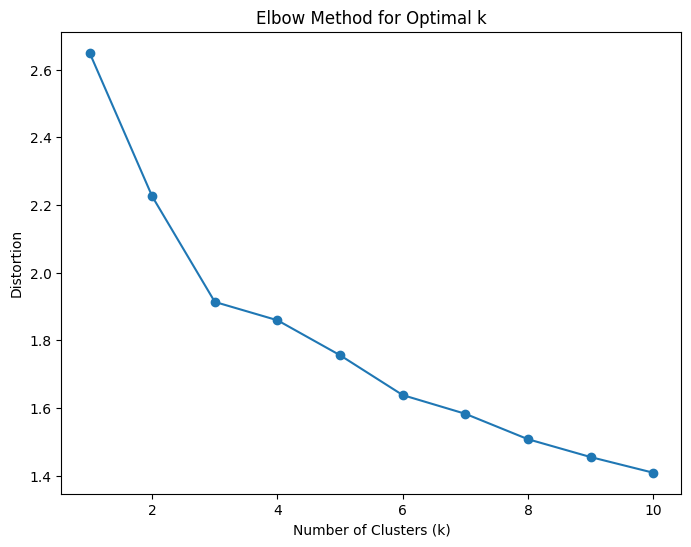

In [7]:
elbow_method(data, 10)

In [8]:
data_val=data.values
centroids,labels=k_means(data_val,3)


C:\Users\8b35r\AppData\Local\Temp\ipykernel_27028\3390553195.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


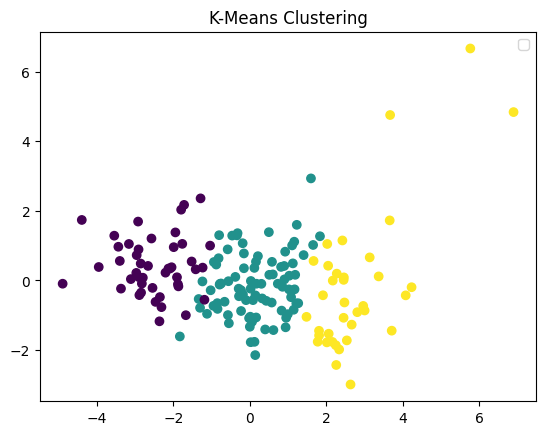

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, marker='o')


plt.title("K-Means Clustering")
plt.legend()
plt.show()

In [10]:
def hierarchical_clustering(data):
    # Compute distance matrix
    distances = cdist(data, data, 'euclidean')
    clusters = {i: [i] for i in range(len(data))}
    linkage_matrix = []

    while len(clusters) > 1:
        # Find the closest clusters
        min_dist = float('inf')
        closest_pair = None

        keys = list(clusters.keys())
        for i, key1 in enumerate(keys):
            for key2 in keys[i + 1:]:
                cluster1 = clusters[key1]
                cluster2 = clusters[key2]
                dist = np.min([distances[p1, p2] for p1 in cluster1 for p2 in cluster2])

                if dist < min_dist:
                    min_dist = dist
                    closest_pair = (key1, key2)

        # Merge the closest clusters
        key1, key2 = closest_pair
        new_cluster = clusters[key1] + clusters[key2]
        new_key = max(clusters.keys()) + 1
        clusters[new_key] = new_cluster

        del clusters[key1]
        del clusters[key2]

        linkage_matrix.append([key1, key2, min_dist, len(new_cluster)])

    return np.array(linkage_matrix)

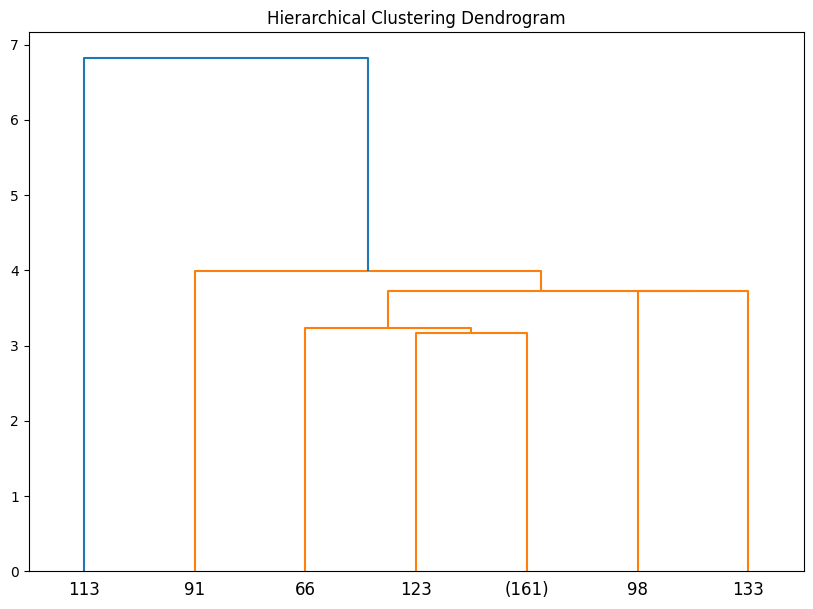

In [11]:
linkage_matrix = hierarchical_clustering(data)

# Visualize Hierarchical Clustering as a Dendrogram
def plot_dendrogram(linkage_matrix):
    from scipy.cluster.hierarchy import dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(linkage_matrix, truncate_mode='level', p=4)
    plt.title("Hierarchical Clustering Dendrogram")
    plt.show()

plot_dendrogram(linkage_matrix)


In [12]:
y=pd.DataFrame(labels)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

In [13]:
y_predicted=[]
from collections import Counter
def knn(X_train,X_test,y_train):
    for x_t in X_test:
        i=0
        arr=[0,0,0]
        loc=[]
        for x,y in zip(X_train,y_train):
            dist=np.sqrt(np.sum((x - x_t) ** 2))
            if(i<3):
                arr[i]=dist
                loc.append(y)
                i+=1
            else:
                for j in range(3):
                    if(arr[j]>dist):
                        arr[j]=dist
                        loc.pop(j)
                        loc.insert(j,y)
        y_predicted.append(loc[0])
    

In [14]:
X_train=X_train.values
X_test=X_test.values
y_train=y_train.values
knn(X_train,X_test,y_train)

In [17]:
y_prec=[]
for i in range(34):
    y_prec.append(y_predicted[i][0])

[np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(2),
 np.int64(2),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1)]

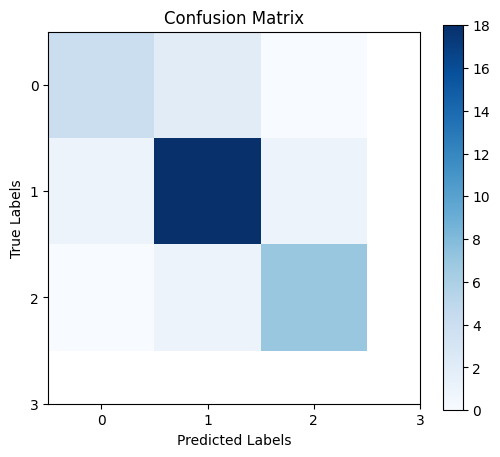

Confusion Matrix:
[[ 4  2  0]
 [ 1 18  1]
 [ 0  1  7]]


In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_prec)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(k), np.arange(k))
plt.yticks(np.arange(k), np.arange(k))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Optionally print the confusion matrix
print("Confusion Matrix:")
print(cm)

In [20]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

true_labels = y_test
predicted_labels = y_prec

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Calculate metrics
accuracy = np.trace(cm) / np.sum(cm)  # Accuracy = sum of diagonal / total samples

precision = precision_score(true_labels, predicted_labels, average=None)  # Precision per class
recall = recall_score(true_labels, predicted_labels, average=None)  # Recall per class
f1 = f1_score(true_labels, predicted_labels, average=None)  # F1-Score per class

# Print the confusion matrix and metrics
print("Confusion Matrix:")
print(cm)

print("\nAccuracy:", accuracy)
print("Precision (per class):", precision)
print("Recall (per class):", recall)
print("F1-Score (per class):", f1)


Confusion Matrix:
[[ 4  2  0]
 [ 1 18  1]
 [ 0  1  7]]

Accuracy: 0.8529411764705882
Precision (per class): [0.8        0.85714286 0.875     ]
Recall (per class): [0.66666667 0.9        0.875     ]
F1-Score (per class): [0.72727273 0.87804878 0.875     ]
